**_Autor_**: Rubén del Mazo Rodríguez

# Construcción de funciones útiles para Redes Neuronales con NumPy

Numpy es el principal paquete para la computación científica en Python. Está mantenido por una gran comunidad (www.numpy.org). En este archivo se muestran varias funciones y técnicas útiles utilizadas en otros archivos del trabajo. Es complementario al anexo _Implementación efectiva de redes neuronales_.

## Tabla de contenidos
- [Funciones de activacion](#1)
    - [Función _step_](#1-1)
    - [Funcion lineal](#1-2)
    - [Función sigmoide y np.exp()](#1-3)
        - [Función sigmoide básica](#1-3-1)
        - [Función sigmoide](#1-3-2)
        - [Gradiente del sigmoide](#1-3-3)
    - [Funcion tangente hiperbólica](#1-4)
    - [Función ReLU](#1-5)
    - [Función ReLU parametrizada](#1-6)
        - [Funcion _Leaky_ Relu](#1-6-1)
- [Reorganización de matrices para el análisis de imágenes](#2)
- [Normalización de filas y _broadcasting_](#3)
    - [Normalización softmax](#3-1)

In [1]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

<a name='1'></a>
## Funciones de activación
La función de activación de un nodo define la salida de ese nodo dada una entrada o un conjunto de entradas. La función de activación decide si una neurona debe activarse o no calculando la suma ponderada y agregando más sesgo con ella. El propósito de la función de activación es introducir no linealidad en la salida de una neurona.

Una red neuronal sin una función de activación es esencialmente un modelo de regresión lineal clásico. La función de activación realiza la transformación no lineal de la entrada, lo que la hace capaz de aprender y realizar tareas más complejas.

<a name='1-1'></a>
### Función _step_

Función de activación basada en umbrales. Si el valor de `z` está por encima de cierto valor, se activa la unidad oculta. Si es menor que el umbral,no. El umbral más común es 0. La función de activación _Step_ se define como:

<img src="imagenes/funcion_step.png" style="width:220px;height:46px;">

Obviamente $f'(x) = 0$ para $x ≠ 0$.

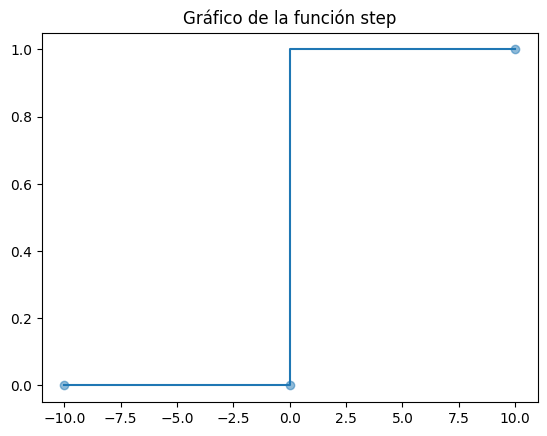

In [2]:
x = (-10, 0, 10)
y = (0, 0 ,1)

plt.step(x, y, where = 'pre')
plt.plot(x, y, 'C0o', alpha = 0.5)
plt.title("Gráfico de la función step")
plt.show()

<a name='1-2'></a>
### Función lineal
Se define como $f(z) = az$, por lo que $f'(z) = a$ para $x ∈ R$. La función de activación lineal se utiliza en un solo lugar, la capa de salida. El efecto de esta función de activación es simplemente escalar los valores provenientes de la última capa oculta, para que se ajusten a los valores objetivo.

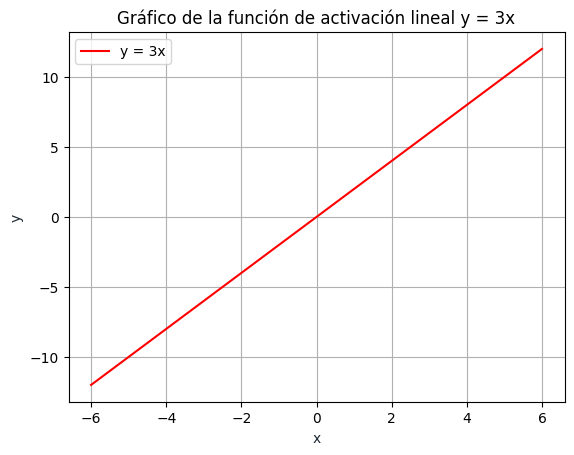

In [3]:
x = np.linspace(-6, 6, 100)
y = 2 * x
plt.plot(x, y, '-r', label='y = 3x')
plt.title('Gráfico de la función de activación lineal y = 3x')
plt.xlabel('x', color = '#1C2833')
plt.ylabel('y', color = '#1C2833')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

<a name='1-3'></a>
### Función sigmoide y np.exp()

La función sigmoide será ampliamente utilizada en este trabajo. También es conocida como **función logística**. Es una función no lineal utilizada no solo en el aprendizaje automático (regresión logística), sino también en el aprendizaje profundo. Matemáticamente se expresa como:

$$\sigma(z) = \frac{1}{1+e^{-z}}\tag{1}$$

Y su representación gráfica es la siguiente:

<img src="imagenes/funcion_sigmoide.png" style="width:300px;height:220px;">
<caption><center><b>Figura 1</b><br> <b>Fuente</b>: <a href="https://ml4a.github.io/ml4a/es/neural_networks/">https://ml4a.github.io/ml4a/es/neural_networks/</a><br></center></caption><br>

<a name='1-3-1'></a>
##### Función sigmoide básica

Devuelve el sigmoide de un número real, _z_. Se incluye únicamente por discusión y poder comparar la biblioteca `math`con la biblioteca `numpy`.

In [4]:
def sigmoide_basico(z):
    """
    Calcula el sigmoide de z.

    Argumentos:
    x -- Numero escalar

    Devuelve:
    s -- sigmoide(z)
    """
    s = 1/(1 + exp(-z))
    
    return s

In [5]:
print("sigmoide_basico(1) = " + str(sigmoide_basico(1)))

sigmoide_basico(1) = 0.7310585786300049


En realidad, rara vez se utiliza la biblioteca `math` en el aprendizaje profundo porque las entradas de las funciones de esta biblioteca son números reales. En el aprendizaje profundo se utilizan sobre todo matrices y vectores. Por eso `numpy` es más útil. Veámoslo con un ejemplo sencillo donde se producirá un **error**.

In [6]:
z = [1, 2, 3] # z ahora es un objeto lista de python
sigmoide_basico(z) # al ejecutarlo saldrá un ERROR, porque z es un vector

TypeError: bad operand type for unary -: 'list'

Utilizando la función exponente de NumPy, si $ z = (z_1, z_2, ..., z_n)$ es un vector fila, entonces `np.exp(z)` aplicará la función exponencial a cada elemento de z. La salida será: `np.exp(z) = (e^{z_1}, e^{z_2}, ..., e^{z_n})`.

In [7]:
# Ejemplo de np.exp
t_z = np.array([1, 2, 3])
print(np.exp(t_z)) # resultado: (exp(1), exp(2), exp(3))

[ 2.71828183  7.3890561  20.08553692]


Además, si z es un vector, entonces una operación de Python con NumPy como $y = z + 3$ o $y = \frac{1}{z}$ dará como resultado un vector "y" del mismo tamaño que z.

In [8]:
# Ejemplo de las operaciones vectoriales de numpy:
print(t_z + 3)
print(1 / t_z)

[4 5 6]
[1.         0.5        0.33333333]


Si se necesita más información sobre una función de numpy, consultesé [la documentación oficial](https://numpy.org/doc/stable/reference/generated/numpy.exp.html). 

También se puede crear una nueva celda  y escribir `np.exp?` (por ejemplo) para acceder rápidamente a la documentación.

<a name='1-3-2'></a>
##### Función sigmoide

Devuelve el sigmoide de un número real, vector o matriz, z. Las estructuras de datos usadas en numpy para representar estas formas (vectores, matrices...) se llaman arrays numpy. Un `ndarray` (_numpy dimensional array_) es un array multidimensional de elementos del mismo tipo. Una diferencia fundamental con las listas en Python, las cuales pueden mantener objetos heterogéneos, es que esta característica propicia que el rendimiento de un ndarray sea bastante mejor que el de una lista convencional.

Matemáticamente:

$$ \text{Para } z \in \mathbb{R}^n \text{,     } \sigma(z) = \sigma{\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix}} = \begin{pmatrix}
    \frac{1}{1+e^{-z_1}}  \\
    \frac{1}{1+e^{-z_2}}  \\
    ...  \\
    \frac{1}{1+e^{-z_n}}  \\
\end{pmatrix}\tag{2} $$

In [9]:
def sigmoide(z):
    """
    Calcula el sigmoide de z.

    Argumentos:
    x -- Un escalar o matriz numpy

    Devuelve:
    s -- sigmoide(z)
    """
    s = 1/(1 + np.exp(-z))
    
    return s

In [10]:
# Ejemplo de ejecución
print("sigmoid(t_z) = " + str(sigmoide(t_z)))

sigmoid(t_z) = [0.73105858 0.88079708 0.95257413]


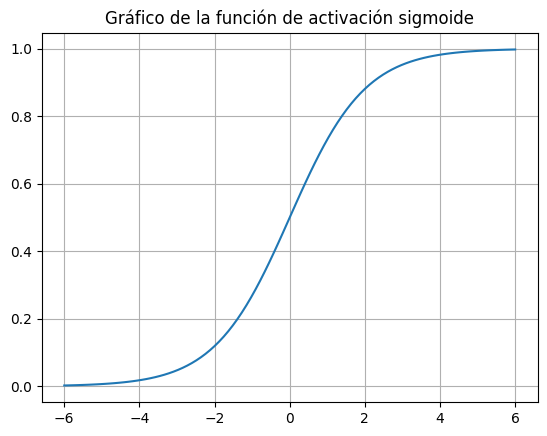

In [11]:
x = np.linspace(-6,6,100)
plt.title('Gráfico de la función de activación sigmoide')
plt.plot(x, sigmoide(x))
plt.grid()
plt.show()

<a name='1-3-3'></a>
##### Gradiente del sigmoide

Es necesario calcular gradientes para optimizar funciones de pérdida usando retropropagación (_backpropagation_). A continuación, se muestra implementado el gradiente del sigmoide, es decir, su derivada con respecto a su entrada, z. Su fórmula es:

$$ \sigma'(z) = \sigma(z) (1 - \sigma(z))\tag{3}$$

In [12]:
def derivada_sigmoide(z):
    """
    Calcula el gradiente (también llamado pendiente o derivada) de la función sigmoidea con respecto a su entrada.
   
    Argumentos:
    z -- Un escalar o matriz numpy

    Devuelve:
    ds -- Gradiente del sigmoide
    """
    s = sigmoide(z)
    ds = s*(1-s)
    
    return ds

In [13]:
print("derivada_sigmoide(t_z) = " + str(derivada_sigmoide(t_z)))

derivada_sigmoide(t_z) = [0.19661193 0.10499359 0.04517666]


<a name='1-4'></a>
### Función tangente hiperbólica
La activación que funciona casi siempre mejor que la función sigmoidea es la función tanh también conocida como función tangente hiperbólica . En realidad, es una versión matemáticamente modificada de la función sigmoidea. Ambos son similares y pueden obtenerse una de la otra entre sí. Se define:

$$ f(z) = \tanh(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}} \tag{4}$$

y su derivada:

$$ f'(z) = \tanh'(z) = 1 - \tanh^{2}{z} \tag{5}$$

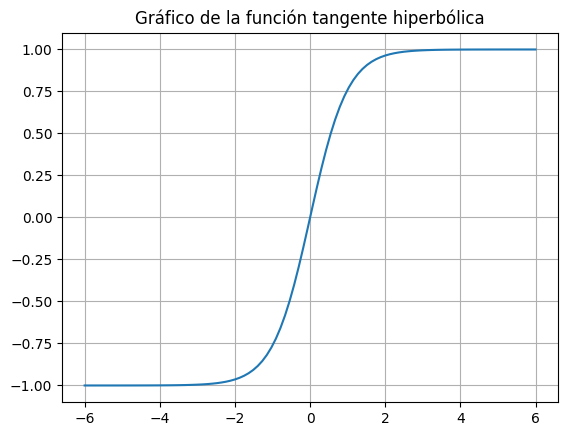

In [14]:
x = np.linspace(-6, 6, 100)
plt.title('Gráfico de la función tangente hiperbólica')
plt.plot(x, np.tanh(x))
plt.grid()
plt.show()

<a name='1-5'></a>
### Función ReLU
ReLu (unidad de rectificación lineal) es la función de activación más utilizada actualmente. Es implementada principalmente en capas ocultas de la red neuronal. ReLu se define como:

$$ f(z) = ReLu(z) = max(0,z) \tag{6}$$

ReLu es menos costosa computacionalmente que tanh y sigmoide porque involucra operaciones matemáticas más simples. A la vez, solamente activa unas pocas neuronas, lo que hace que la red sea dispersa, lo que la hace eficiente y fácil de calcular. En palabras simples, ReLu permite a la red aprender mucho más rápido que la funciones sigmoide y tanh.

In [15]:
def relu(Z):
    """
    Implementa la funcion ReLU.

    Argumentos:
    Z -- array de NumPy de cualquier dimension (salida lineal de la capa)

    Returns:
    A -- resultado de aplicar relu(Z), de las mismas dimensiones que Z. Es el parametro post-activacion.
    """
    
    A = np.maximum(0,Z)

    return A

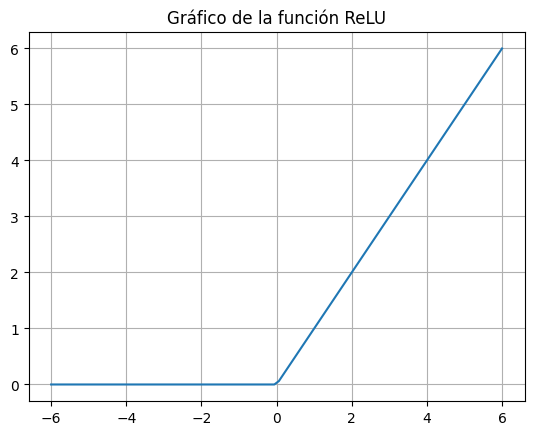

In [16]:
x = np.linspace(-6, 6, 100)
plt.title('Gráfico de la función ReLU')
plt.plot(x, relu(x))
plt.grid()
plt.show()

<a name='1-6'></a>
### Función ReLU parametrizada
La función ReLU tiene algunas limitaciones. Una de las principales limitaciones de ReLU es el caso en el que las actualizaciones de gran peso pueden significar que la entrada sumada a la función de activación es siempre negativa, independientemente de la entrada a la red. Esto significa que un nodo con este problema siempre generará un valor de activación de 0. Esto se conoce como  «ReLU moribunda».

Algunas extensiones populares de ReLU, como PReLU, relajan la salida no lineal de la función para permitir pequeños valores negativos de alguna manera. Se define:

<img src="imagenes/funcion_PReLU.png" style="width:130px;height:45px;">

<a name='1-6-1'></a>
### Función Leaky ReLU
Es una particularización de PReLU, donde la pendiente es 0.01. En lugar de tener una pendiente cero para valores negativos, tiene una pendiente pequeña. Esto significa que la función no se detiene completamente en valores negativos, lo que puede ayudar a evitar la saturación de la neurona. Esta función se utiliza en las redes neuronales convolucionales (CNN), que son ampliamente utilizadas en el procesamiento de imágenes. También se utiliza en las redes neuronales recurrentes (RNN), que se utilizan en el procesamiento del lenguaje natural y en la generación de texto.

<img src="imagenes/funcion_LReLU.png" style="width:130px;height:45px;">

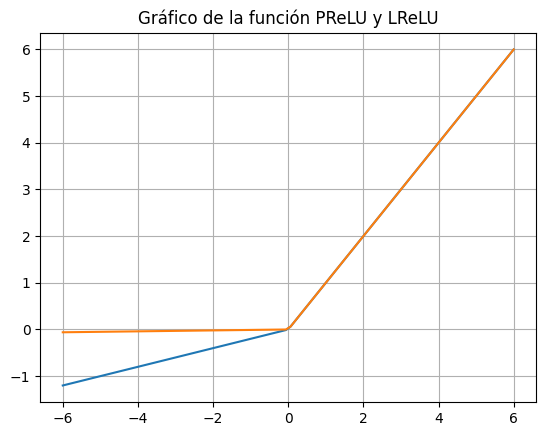

In [17]:
def PRelu(a, x):
    y= np.zeros(x.shape)
    return np.ndarray.flatten(np.max([[y],[x]], axis = 0)) + a*np.ndarray.flatten(np.min([[y],[x]], axis =0))

x = np.linspace(-6, 6, 100)
a = 0.2 
leaky = 0.01 # Leaky ReLU
plt.title('Gráfico de la función PReLU y LReLU')
plt.plot(x, PRelu(a, x))
plt.plot(x, PRelu(leaky, x))
plt.grid()
plt.show()

Hay muchas más, pero con las mencionadas en este trabajo y su alcance, es suficiente.

Referencias: 

https://dustinstansbury.github.io/theclevermachine/derivation-backpropagation

https://en.wikipedia.org/wiki/Activation_function

https://www.geeksforgeeks.org/activation-functions-neural-networks/

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

<a name='2'></a>
### Reorganización de matrices para el análisis de imágenes

Dos funciones de NumPy comúnmente utilizadas en el aprendizaje profundo son [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) y [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html).

- X.shape se utiliza para obtener la forma (dimensión) de una matriz/vector X.
- X.reshape(...) se utiliza para cambiar las dimensiones de X a otras dimensiones.

Por ejemplo, en informática, una imagen se representa por una matriz 3D de forma $(longitud, altura, profundidad = 3)$. Sin embargo, cuando se lee una imagen como entrada de un algoritmo se convierte en un vector de forma $(longitud*altura*3, 1)$. En otras palabras, se transforma la matriz 3D en un vector 1D.

<img src="imagenes/imagen_a_vector.png" style="width:500px;height:300px;">

A continuación, se implementa una función que toma con argumentos la dimensión de la imagen (longitud, altura, 3) y devuelve un vector con dimensiones (longitud \*altura\*3,1). Por ejemplo, si queremos transformar una matriz v de dimensiones (a, b, c) en un vector de dimension (a\*b,c), haríamos lo siguiente:

``` python
v = v.reshape((v.shape[0] * v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```

> Consejos:
> - No definir a mano los valores de las dimensiones de la imagen. En su lugar, utilizar `imagen.shape[indice]`.
> - Se puede utilizar `v = v.reshape(-1,1)`, pero es importante saber qué hace. De acuerdo a la documentación: [...] una de las dimensiones a especificar puede ser -1. En este caso, su valor se infiere a partir de la longitud de la matriz y las dimensiones restantes.

In [18]:
def imagen_a_vector(imagen):
    """
    Argumento:
    imagen -- una matriz numpy de forma (longitud, altura, profundidad)
    
    Devuelve:
    v      -- un vector de forma (longitud*altura*profundidad, 1)
    """
    v = imagen.reshape((imagen.shape[0]*imagen.shape[1]*imagen.shape[2],1))
    # tambien valdria:
    # v = v.reshape(-1,1)
    # lo que hacemos es decirle que ajuste automaticamente una de las dimensiones, en este caso las filas, para que el resultado
    # sea un vector con una columna.
    
    return v

In [19]:
# Esta es una matriz de 3 por 3 por 2, típicamente las imágenes serán (num_px_x, num_px_y,3) donde 3 representa los valores RGB
t_imagen = np.array([[[ 0.6826139,  0.2380381],
                        [ 0.9714982,  0.5835647],
                        [ 0.415251 ,  0.4017551]],

                        [[ 0.2814219,  0.6677647],
                        [ 0.5304703,  0.2351845],
                        [ 0.9981397,  0.7417313]],

                        [[ 0.6659855,  0.0533165],
                        [ 0.1820313,  0.9978937],
                        [ 0.3144279,  0.4630077]]])

print ("imagen_a_vector(imagen) = " + str(imagen_a_vector(t_imagen)))


imagen_a_vector(imagen) = [[0.6826139]
 [0.2380381]
 [0.9714982]
 [0.5835647]
 [0.415251 ]
 [0.4017551]
 [0.2814219]
 [0.6677647]
 [0.5304703]
 [0.2351845]
 [0.9981397]
 [0.7417313]
 [0.6659855]
 [0.0533165]
 [0.1820313]
 [0.9978937]
 [0.3144279]
 [0.4630077]]


<a name='3'></a>
### Normalización de filas  y _broadcasting_

Otra técnica común que se utiliza en Machine Learning y Deep Learning es normalizar los datos. A menudo conduce a un mejor rendimiento porque el descenso de gradiente converge más rápido después de la normalización. Aquí, por normalización nos referimos a cambiar _x_ por $ \frac{x}{\| x\|} $ (dividiendo cada vector fila de _x_ por su normalización).

Por ejemplo, si 
$$x = \begin{bmatrix}
        1 & 4 & 5 \\
        3 & 7 & 8 \\
\end{bmatrix}\tag{7}$$ 
entonces 
$$\| x\| = \text{np.linalg.norm(x, axis=1, keepdims=True)} = \begin{bmatrix}
    \sqrt{42} \\
    \sqrt{122} \\
\end{bmatrix}\tag{8} $$
y
$$ x\_normalizada = \frac{x}{\| x\|} = \begin{bmatrix}
    \frac{1}{\sqrt{42}} & \frac{4}{\sqrt{42}} & \frac{5}{\sqrt{42}} \\
    \frac{3}{\sqrt{122}} & \frac{7}{\sqrt{122}} & \frac{8}{\sqrt{122}} \\
\end{bmatrix}\tag{9}$$

Con `keepdims=True` el resultado se propagará correctamente contra la x original. "Propagar" es la palabra que utilizado para el término inglés **_broadcasting_**. El broadcasting en Python es una estrategia o método de planificación de la biblioteca “numpy” de Python, para operar y hacer más eficientes los cálculos con matrices multidimensionales (arrays). El broadcasting permite aplicar la vectorización a arrays de diferente tamaño. En otras palabras, el broadcasting es una poderosa herramienta para escribir un código corto y normalmente intuitivo que realiza sus cálculos de forma muy eficiente.

`axis=1` significa que se va a obtener la norma de cada fila. Si se necesita la norma por columnas, utilizaremos `axis=0`.

numpy.linalg.norm tiene otro parámetro `ord` donde se especifica el tipo de normalización a realizar. Para más información, [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

A continuación, un ejemplo de función para normalizar las filas de una matriz. Tras aplicar la función a la matriz de entrada _x_, cada fila debe ser un vector de longitud unidad (= 1).

**Nota**: No se puede usar `x /= x_norm`. Para la división matricial NumPy debe propagar (_broadcast_) la `x_norm`, que no es soportada por el operador `/=`.

In [20]:
def normalizar_filas(x):
    """
    Implementa una función que normalice cada fila de la matriz x (para que tenga longitud unitaria).
    
    Argumentos:
    x -- Una matriz numpy de forma (n, m)
    
    Devuelve:
    x -- La matriz numpy normalizada (por fila)
    """
    x_norm = np.linalg.norm(x, ord = 2, axis = 1, keepdims = True)
    print("Dimensiones de x_norm = ", x_norm.shape)
    x = x / x_norm # x /= x_norm no soportado
    print("Dimensiones de x = ", x.shape)

    return x

In [21]:
x = np.array([[1, 4, 5],
              [3, 7, 8]])
print("normalizar_filas(x) = \n" + str(normalizar_filas(x)))

Dimensiones de x_norm =  (2, 1)
Dimensiones de x =  (2, 3)
normalizar_filas(x) = 
[[0.15430335 0.6172134  0.77151675]
 [0.27160724 0.63375022 0.72428597]]


En normalizar_filas(), si sacamos por pantalla las dimensiones de x_norm y x, vemos que tienen formas diferentes. Esto es normal dado que x_norm toma la norma de cada fila de x. Así que x_norm tiene el mismo número de filas pero sólo 1 columna.

¿Qué sucedería si pusiéramos `keepdims = False`? Que tendríamos un vector 1D y, por tanto, no podría aplicarse correctamente el _broadcasting_, resultando en error si intentamos hacer `x / x_norm`

In [22]:
x_norm = np.linalg.norm(x, ord = 2, axis = 1, keepdims = False)
x_norm.shape

(2,)

In [23]:
# Ejemplo de error en el broadcasting si el vector es 1D
x_mod = x / x_norm
print(x_mod)

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

<a name='3-1'></a>
##### Normalización softmax

La normalización softmax es una función matemática que se utiliza para “comprimir” un vector N-dimensional de valores reales arbitrarios en un vector N-dimensional de valores reales en el rango [0, 1]. La función softmax se utiliza comúnmente como capa final de los clasificadores basados en redes neuronales. Tales redes son comúnmente entrenadas usando un régimen de entropía cruzada, con lo que se obtiene una variante no lineal de la regresión logística multinomial.

En palabras más llanas, se puede pensar en softmax como una función de normalización utilizada cuando el algoritmo necesita clasificar dos o más clases.

Veamos su expresión matemática en detalle:

$$\sigma(x)_{ij} = \frac{e^{x_{ij}}}{\sum_{j=1}^m e^{x_{nj}}}\tag{10}$$

es la normalización softmax del elemento en la fila $i^{th}$ en la columna $j^{th}$ de _x_.

- $\text{Si } x \in \mathbb{R}^{1\times m} \text{,     }$

\begin{align*}
 \sigma(x) &= \sigma\left(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}\right) \\&= \begin{bmatrix}
    \frac{e^{x_1}}{\sum_{j}^me^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}^me^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}^me^{x_j}} 
\end{bmatrix}\tag{11}
\end{align*}

- $\text{Para una matriz } x \in \mathbb{R}^{n \times m} \text{,  $x_{ij}$ corresponde al elemento de la fila $i^{th}$ y columna $j^{th}$ de $x$, por lo que aplicando lo anterior tenemos: }$  

\begin{align*}
\sigma(x) &= \sigma\begin{bmatrix}
            x_{11} & x_{12} & x_{13} & \dots  & x_{1m} \\
            x_{21} & x_{22} & x_{23} & \dots  & x_{2m} \\
            \vdots & \vdots & \vdots & \ddots & \vdots \\
            x_{n1} & x_{n2} & x_{n3} & \dots  & x_{nm}
            \end{bmatrix} \\ \\&= 
 \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1m}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2m}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{n1}}}{\sum_{j}e^{x_{nj}}} & \frac{e^{x_{n2}}}{\sum_{j}e^{x_{nj}}} & \frac{e^{x_{n3}}}{\sum_{j}e^{x_{nj}}} & \dots  & \frac{e^{x_{nm}}}{\sum_{j}e^{x_{nj}}}
\end{bmatrix} \\ \\ &= \begin{pmatrix}
    \sigma\text{(primera fila de x)}  \\
    \sigma\text{(segunda fila de x)} \\
    \vdots  \\
    \sigma\text{(última fila de x)} \\
\end{pmatrix}\tag{12} 
\end{align*}

> **Nota importante**: En el trabajo `m` se utiliza para representar el "número de ejemplos de entrenamiento", y cada ejemplo de entrenamiento corresponderá a una columna de la matriz. Además, cada característica estará en su propia fila (cada fila tendrá los datos de una misma característica).
Como softmax debe realizarse para todas las características de cada ejemplo de entrenamiento, se aplicaría en las columnas, mientras que las fórmulas (7), (8) y (9) son la definición genérica y se aplica a las filas. Es decir, a esas fórmulas habría que "voltearlas".

In [24]:
def softmax_columnas(x):
    """
    Calcula la normalizacion softmax para cada columna de la entrada x, sea un vector o matrices de forma (n,m)

    Argumentos:
    x -- Un vector numpy fila o columna o una matriz numpy de forma (n,m)

    Devuelve:
    s -- Una matriz numpy igual al softmax de x, de forma (n,m)    
    """
    x_exp = np.exp(x)
    print("Dimensiones de x_exp = ", x_exp.shape)
    x_sum = np.sum(x_exp, axis = 0, keepdims = True) # aplicacion en las columnas con axis = 0.
    print("Dimensiones de x_sum = ", x_sum.shape)
    s = x_exp / x_sum # Aplica automaticamente NumPy broadcasting, simplificando el codigo enormemente
    
    return s

In [25]:
# Ejemplo vector fila
x_fila = np.array([[1],[2],[3],[4]])
print(x_fila.shape)
print("softmax(x_fila) = \n" + str(softmax_columnas(x_fila)))

(4, 1)
Dimensiones de x_exp =  (4, 1)
Dimensiones de x_sum =  (1, 1)
softmax(x_fila) = 
[[0.0320586 ]
 [0.08714432]
 [0.23688282]
 [0.64391426]]


In [26]:
# Ejemplo vector columna
x_columna = np.array([[1,2,3,4]])
print(x_columna.shape)
print("softmax(x_columna) = \n" + str(softmax_columnas(x_columna)))

(1, 4)
Dimensiones de x_exp =  (1, 4)
Dimensiones de x_sum =  (1, 4)
softmax(x_columna) = 
[[1. 1. 1. 1.]]


Vemos que el resultado de softmax en un vector columna es 1 en cada miembro, puesto que el sumatorio de cada divisor es el mismo número al solo haber un elemento. En el vector fila, vemos que las dimensiones son distintas, pero aún así la división se realiza corréctamente; esto se debe al **_broadcasting_**.

In [27]:
# Ejemplo matriz 2x4
matriz = np.array([[6, 2, 5, 3],
                [7, 4, 1, 2]])
print("softmax(matriz) = \n" + str(softmax_columnas(matriz)))

Dimensiones de x_exp =  (2, 4)
Dimensiones de x_sum =  (1, 4)
softmax(matriz) = 
[[0.26894142 0.11920292 0.98201379 0.73105858]
 [0.73105858 0.88079708 0.01798621 0.26894142]]


De nuevo en la matriz vemos dimensiones diferentes para x_exp y x_sum cuya división funciona gracias al _broadcasting_.